In [ ]:
# This notebook loads in the data from the marmoset and computes a histogram of the spatial frequency selectivity

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
marm_data = pd.read_hdf('../data/parker/marm.h5')

In [3]:
def get_group_h5_keys(savepath):
    """ Get the keys of a group h5 file.

    This will list the keys (i.e. the session names) of an h5 file
    written by the function write_group_h5 (above). It does not need
    to read the entire file into memory to check these values.

    Parameters
    ----------
    savepath : str
        Path to the .h5 file.
    
    Returns
    -------
    keys : list
        List of keys (i.e. session names) in the h5 file.

    """

    with pd.HDFStore(savepath) as hdf:
        
        keys = [k.replace('/','') for k in hdf.keys()]

    return keys

In [4]:
def read_group_h5(path, keys=None):
    """ Read a group h5 file.

    This will read in a group h5 file written by the function
    write_group_h5 (above). It will read in all keys and stack
    them into a single dataframe. Alternatively, you can specify
    a list of keys to read in from the keys present, and only those
    recordings will be read into memory and stacked together.
    
    Parameters
    ----------
    path : str
        Path to the .h5 file.
    keys : list or str (optional).
        List of keys (i.e. session names) in the h5 file. If None,
        all keys will be read in.
    
    Returns
    -------
    df : pandas.DataFrame
        Dataframe containing all data from the h5 file.

    """

    if type(keys) == str:

        df = pd.read_hdf(path, keys)

        return df
    
    if keys is None:

        keys = get_group_h5_keys(path)

    dfs = []
    for k in sorted(keys):

        _df = pd.read_hdf(path, k) 
        dfs.append(_df)

    df = pd.concat(dfs)

    return df

In [ ]:
mouse_data = read_group_h5('data/parker/hffm.h5')

In [4]:
# compute a histogram of the preferred spatial frequency
bins = np.logspace(np.log10(0.01), np.log10(10), 50)
print(len(marm_data['sf_pref']))
print(len(mouse_data['sf_pref_cpd']))
plt.hist(marm_data['sf_pref'], bins=bins, weights=np.ones_like(marm_data['sf_pref'])/len(marm_data['sf_pref']), label='marmoset')
plt.hist(mouse_data['sf_pref_cpd'], bins=bins, weights=np.ones_like(mouse_data['sf_pref_cpd'])/len(mouse_data['sf_pref_cpd']), label='mouse')
plt.xscale('log')
plt.legend()
plt.xlabel('Preferred spatial frequency (cpd)')
plt.ylabel('Proportion of cells')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# save the mouse and marmoset spatial frequencies as a npy array
np.save('../data/parker/marm_sf.npy', marm_data['sf_pref'])
np.save('../data/parker/mouse_sf.npy', mouse_data['sf_pref_cpd'])

In [ ]:
# save the mouse and marmoset spatial frequencies as a npy array
marm_data = np.load('../data/parker/marm_sf.npy')
mouse_data = np.load('../data/parker/mouse_sf.npy')

In [4]:
marm_data.max()

9.649429471025163

334
716


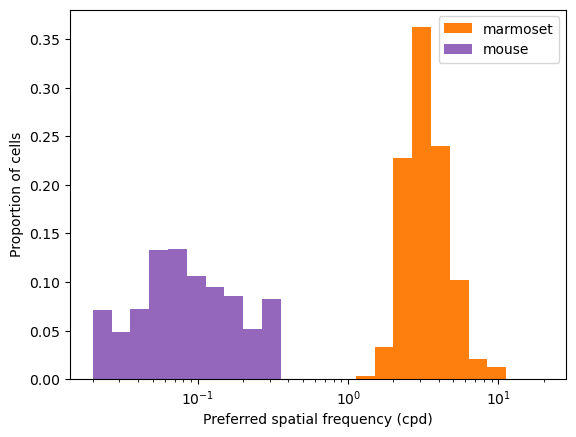

In [19]:
# compute a histogram of the preferred spatial frequency
bins = 2*np.logspace(-2, 1, 25)
print(len(marm_data))
print(len(mouse_data))
plt.hist(marm_data, bins=bins, weights=np.ones_like(marm_data)/len(marm_data), label='marmoset', color='tab:orange')
plt.hist(mouse_data, bins=bins, weights=np.ones_like(mouse_data)/len(mouse_data), label='mouse', color='tab:purple')
plt.xscale('log')
plt.legend()
plt.xlabel('Preferred spatial frequency (cpd)')
plt.ylabel('Proportion of cells')
plt.savefig('cosyne_2025_figures/spatial_freq_mouse_marm.svg', format='svg', bbox_inches='tight')

In [8]:
np.nanmax(mouse_data)

0.32000000000000023

In [ ]:
low_freq_arr = np.linspace(0.02, 0.36, 35)
high_freq_arr = np.arange(2, 6.12, .12)
freq_arr = np.concatenate((low_freq_arr, high_freq_arr))

In [52]:
freq_arr

array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
       0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23,
       0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34,
       0.35, 0.36, 2.  , 2.12, 2.24, 2.36, 2.48, 2.6 , 2.72, 2.84, 2.96,
       3.08, 3.2 , 3.32, 3.44, 3.56, 3.68, 3.8 , 3.92, 4.04, 4.16, 4.28,
       4.4 , 4.52, 4.64, 4.76, 4.88, 5.  , 5.12, 5.24, 5.36, 5.48, 5.6 ,
       5.72, 5.84, 5.96, 6.08])